#

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import datetime as dt

In [2]:
stock = (input("Please enter stock ticker code to compare to S&P500: ")).upper()
stocks = (stock + " SPY").split()
start = dt.date.today() - dt.timedelta(365)

Please enter stock ticker code to compare to S&P500:  GOOG


In [3]:
data = yf.download(stocks, start)["Close"]
data.head()

[*********************100%***********************]  2 of 2 completed


Ticker,GOOG,SPY
Date,,
2023-10-18 00:00:00+00:00,139.279999,430.209991
2023-10-19 00:00:00+00:00,138.979996,426.429993
2023-10-20 00:00:00+00:00,136.740005,421.190002
2023-10-23 00:00:00+00:00,137.899994,420.459991
2023-10-24 00:00:00+00:00,140.119995,423.630005


In [4]:
returns = np.log(data).diff().dropna()
returns.head()

Ticker,GOOG,SPY
Date,,
2023-10-19 00:00:00+00:00,-0.002156,-0.008825
2023-10-20 00:00:00+00:00,-0.016249,-0.012364
2023-10-23 00:00:00+00:00,0.008447,-0.001735
2023-10-24 00:00:00+00:00,0.015970,0.007511
2023-10-25 00:00:00+00:00,-0.100914,-0.014456


In [5]:
sample = returns.sample(60).corr()
sample

Ticker,GOOG,SPY
Ticker,,
GOOG,1.0000,0.2781
SPY,0.2781,1.0000


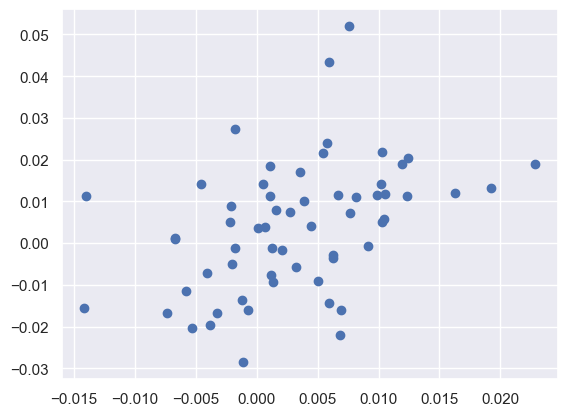

In [6]:
sample = returns.sample(60)
plt.scatter(x=sample['SPY'], y=sample[stock]);

In [7]:
reg = np.polyfit(sample['SPY'], sample[stock], deg = 1)
reg

array([0.90211959, 0.00106868])

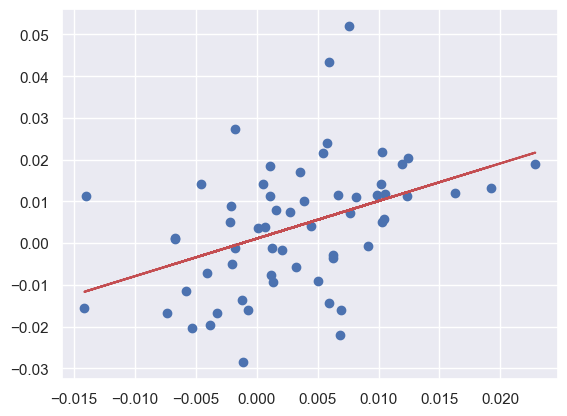

In [8]:
trend = np.polyval(reg, sample['SPY'])
plt.scatter(sample['SPY'], sample[stock])
plt.plot(sample["SPY"], trend, 'r')

In [9]:
data = pd.DataFrame(yf.download('SPY', start)['Close'])
time = np.arange(1, len(data) + 1)
data['time'] = time
data = data[['time', 'Close']]
data = round(data,2)
data.tail()

[*********************100%***********************]  1 of 1 completed


,time,Close
Date,,
2024-10-11,248,579.58
2024-10-14,249,584.32
2024-10-15,250,579.78
2024-10-16,251,582.30
2024-10-17,252,584.16


In [10]:
reg = np.polyfit(data['time'], data["Close"], deg = 1)
reg


array([  0.55250166, 442.44389774])

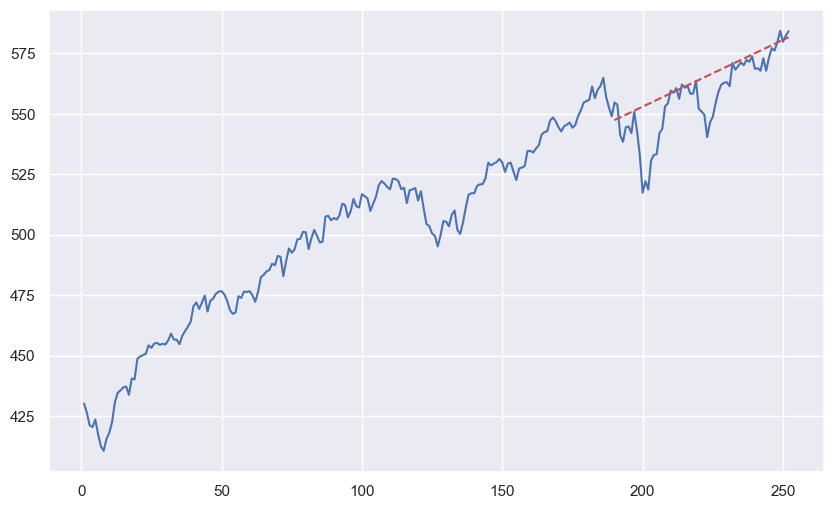

In [11]:
trend = np.polyval(reg, data['time'][-63:])
std = data['Close'][-63:].std()
plt.figure(figsize=(10,6))
plt.plot(data['time'], data['Close'], label ="S&P500")
plt.plot(data['time'][-63:], trend, 'r--')
plt.plot(data['time'][-63:], trend - std, 'g--')
plt.plot(data['time'][-63:], trend + std, 'g--')


